### 1. Import data and revelant packages 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/admin/Desktop/Y3S2/BT4222/combined.csv')
df.head()

,district,street,propertyType,remaining_lease,price,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_area_sqm,floor_range
0,5,ZEHNDER ROAD,Semi-detached,inf,5500000.0,"['HILLGROVE SECONDARY SCHOOL', 'QUEENSTOWN SEC...","['Pasir Panjang Food Centre', 'Clementi West S...","['NTUC FAIRPRICE CO-OPERATIVE LTD', 'COLD STOR...",0,NaN,1.282130,103.786879,524.3,-
1,5,ZEHNDER ROAD,Semi-detached,inf,5000000.0,"['HILLGROVE SECONDARY SCHOOL', 'QUEENSTOWN SEC...","['Pasir Panjang Food Centre', 'Clementi West S...","['NTUC FAIRPRICE CO-OPERATIVE LTD', 'COLD STOR...",0,NaN,1.282130,103.786879,308.0,-
2,5,ZEHNDER ROAD,Semi-detached,inf,4750000.0,"['HILLGROVE SECONDARY SCHOOL', 'QUEENSTOWN SEC...","['Pasir Panjang Food Centre', 'Clementi West S...","['NTUC FAIRPRICE CO-OPERATIVE LTD', 'COLD STOR...",0,NaN,1.282130,103.786879,314.0,-
3,5,NEO PEE TECK LANE,Terrace,inf,2630000.0,"['HILLGROVE SECONDARY SCHOOL', 'QUEENSTOWN SEC...","['Pasir Panjang Food Centre', 'Clementi West S...","['NTUC FAIRPRICE CO-OPERATIVE LTD', 'COLD STOR...",2,NaN,1.292047,103.768591,159.3,-
4,4,COVE DRIVE,Condominium,84.92,2800000.0,"['FAIRFIELD METHODIST SCHOOL (SECONDARY)', 'QU...",['Telok Blangah Drive Blk 82 (Telok Blangah Ma...,"['NTUC FAIRPRICE CO-OPERATIVE LTD', 'THE QUALI...",0,NaN,1.244208,103.827487,223.0,01-05


### 2. Examine and Explore Data

In [3]:
df.describe()

,district,remaining_lease,price,Bus Stops Nearby,crime_number,latitude,longitude,floor_area_sqm
count,132607.000000,132607.00,1.326070e+05,132607.000000,122560.000000,132607.000000,132607.000000,132607.000000
mean,18.193391,inf,9.562546e+05,0.121479,134.318621,1.358879,103.845187,114.282205
std,5.345945,NaN,1.622821e+06,0.362613,47.645843,0.043521,0.068382,88.556745
min,1.000000,2.58,4.000000e+04,0.000000,35.428571,1.239641,103.687191,24.000000
25%,16.000000,67.08,3.700000e+05,0.000000,122.714286,1.326058,103.793446,84.000000
50%,20.000000,80.25,5.000000e+05,0.000000,122.714286,1.355269,103.847709,102.000000
75%,20.000000,93.33,9.350000e+05,0.000000,169.428571,1.389063,103.898665,121.000000
max,28.000000,inf,1.090000e+08,2.000000,226.000000,1.460839,103.987293,4836.400000


In [4]:
df.columns

Index(['district', 'street', 'propertyType', 'remaining_lease', 'price',
       'school', 'hawkercentre', 'supermarkets', 'Bus Stops Nearby',
       'crime_number', 'latitude', 'longitude', 'floor_area_sqm',
       'floor_range'],
      dtype='object')

In [5]:
df.dtypes

district              int64
street               object
propertyType         object
remaining_lease     float64
price               float64
school               object
hawkercentre         object
supermarkets         object
Bus Stops Nearby      int64
crime_number        float64
latitude            float64
longitude           float64
floor_area_sqm      float64
floor_range          object
dtype: object

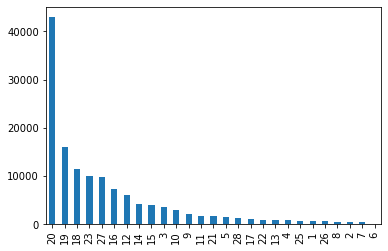

In [6]:
# print(df['district'].value_counts())
df['district'].value_counts().plot(kind='bar')

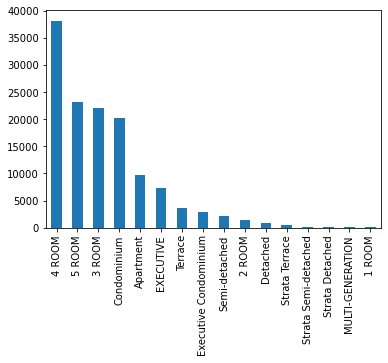

In [7]:
# print(df['propertyType'].value_counts())
df['propertyType'].value_counts().plot(kind='bar')

In [8]:
df['floor_area_sqm'].describe()

count    132607.000000
mean        114.282205
std          88.556745
min          24.000000
25%          84.000000
50%         102.000000
75%         121.000000
max        4836.400000
Name: floor_area_sqm, dtype: float64

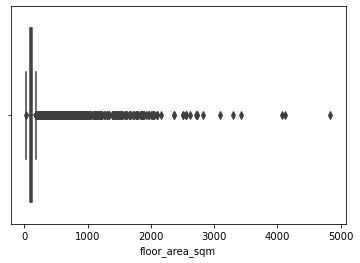

In [9]:
sns.boxplot(x=df['floor_area_sqm'])

In [10]:
df['price'].describe()

count    1.326070e+05
mean     9.562546e+05
std      1.622821e+06
min      4.000000e+04
25%      3.700000e+05
50%      5.000000e+05
75%      9.350000e+05
max      1.090000e+08
Name: price, dtype: float64

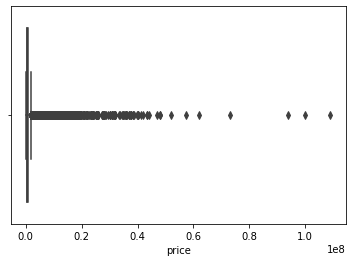

In [11]:
sns.boxplot(x=df['price'])

### 3. Plot charts to see if there are relations between each variable with price

#### 3.1 Categorical Variables
- district 
- street
- propertyType

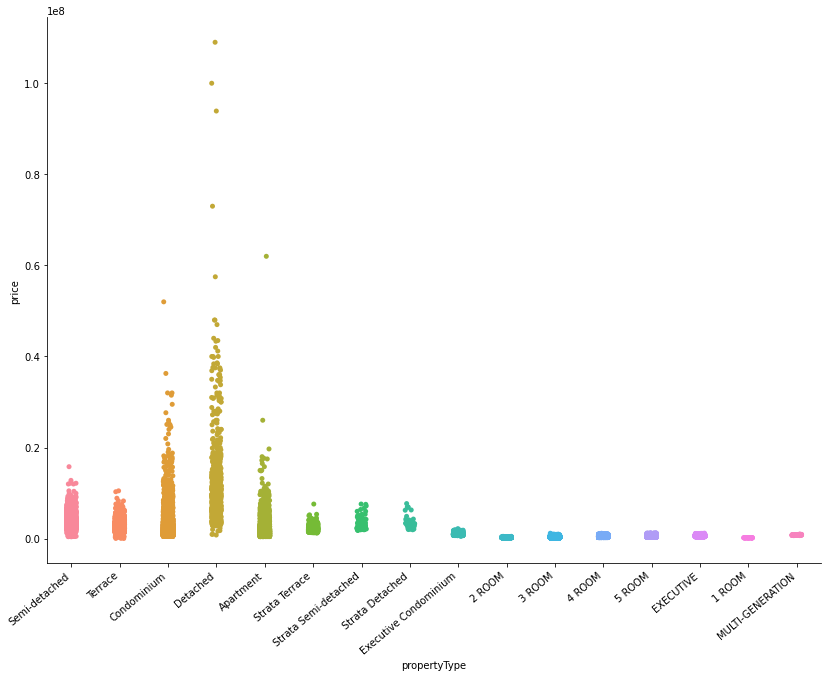

In [12]:
# Relationship between propertyType and price 
import seaborn as sns
ax = sns.catplot(data=df, x='propertyType', y='price', height=8.27, aspect=11.7/8.27)
ax.set_xticklabels(rotation=40, ha="right")

In [13]:
categorical_features = [feature for feature in df.columns if
                       df[feature].dtypes == 'O']
print(categorical_features)

['street', 'propertyType', 'school', 'hawkercentre', 'supermarkets', 'floor_range']


In [14]:
categorical_features.remove('floor_range')

In [15]:
#ax = sns.catplot(data=df, x='street', y='price', height=8.27, aspect=11.7/8.27)
#ax.set_xticklabels(rotation=40, ha="right")

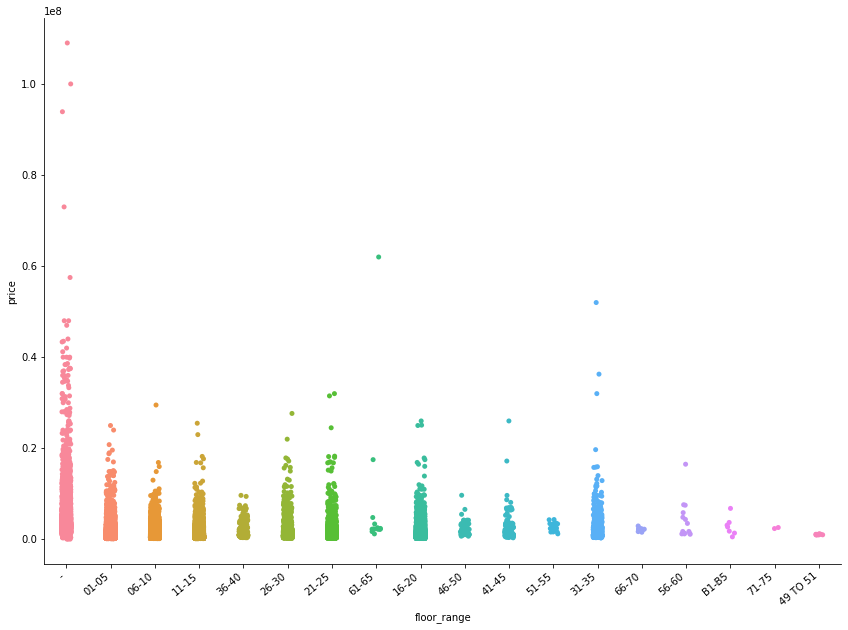

In [16]:
ax = sns.catplot(data=df, x='floor_range', y='price', height=8.27, aspect=11.7/8.27)
ax.set_xticklabels(rotation=40, ha="right")

#### 3.2 Multicollinearity

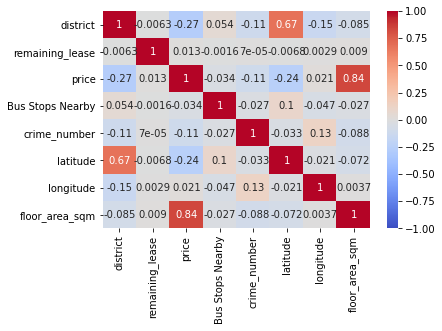

In [17]:
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

#### 3.3 Common Factors Affecting Price 

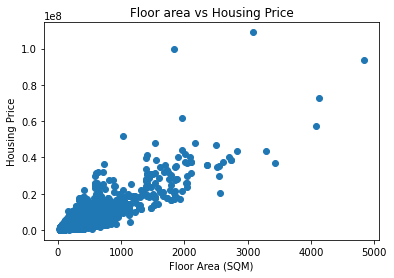

In [18]:
# Price and Square Meters of Flat
plt.scatter(df.floor_area_sqm, df.price)
plt.xlabel('Floor Area (SQM)')
plt.ylabel('Housing Price')
plt.title('Floor area vs Housing Price')
plt.show()

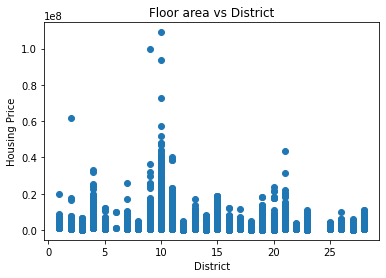

In [19]:
# Price and district of Flat
plt.scatter(df.district, df.price)
plt.xlabel('District')
plt.ylabel('Housing Price')
plt.title('Floor area vs District')
plt.show()

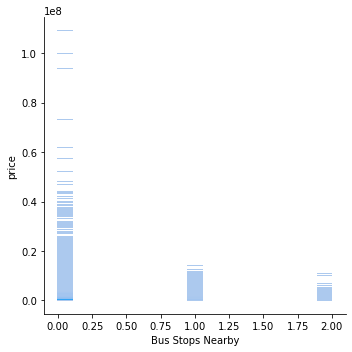

In [20]:
# Price and bus stops nearby
sns.displot(df, x="Bus Stops Nearby", y="price")

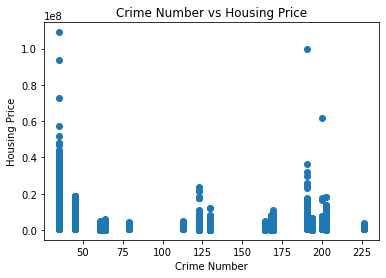

In [21]:
# Price and Crime Number
plt.scatter(df.crime_number, df.price)
plt.xlabel('Crime Number')
plt.ylabel('Housing Price')
plt.title('Crime Number vs Housing Price')
plt.show()

### 4. Editing Data

In [22]:
print(categorical_features)

['street', 'propertyType', 'school', 'hawkercentre', 'supermarkets']


In [23]:
# Label Encoding 
df['street'] = df['street'].astype('category')
df['street'] = df['street'].cat.codes

df['propertyType'] = df['propertyType'].astype('category')
df['propertyType'] = df['propertyType'].cat.codes

df['school'] = df['school'].astype('category')
df['school'] = df['school'].cat.codes

df['hawkercentre'] = df['hawkercentre'].astype('category')
df['hawkercentre'] = df['hawkercentre'].cat.codes

df['supermarkets'] = df['supermarkets'].astype('category')
df['supermarkets'] = df['supermarkets'].cat.codes

In [24]:
df['floor_range'] = df['floor_range'].astype('category')
df['floor_range'] = df['floor_range'].cat.codes

In [25]:
df = df.replace(np.inf, 999)

In [26]:
df['crime_number'].fillna(value=df['crime_number'].mean(), inplace=True)

In [27]:
df['price'] = df['price'] / 100000

In [28]:
df.head()

,district,street,propertyType,remaining_lease,price,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_area_sqm,floor_range
0,5,2002,11,999.00,55.0,8,17,6,0,134.318621,1.282130,103.786879,524.3,0
1,5,2002,11,999.00,50.0,8,17,6,0,134.318621,1.282130,103.786879,308.0,0
2,5,2002,11,999.00,47.5,8,17,6,0,134.318621,1.282130,103.786879,314.0,0
3,5,1322,15,999.00,26.3,8,17,6,2,134.318621,1.292047,103.768591,159.3,0
4,4,375,6,84.92,28.0,6,22,16,0,134.318621,1.244208,103.827487,223.0,1


### 5. Linear Regression

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1),
                                                    df['price'], 
                                                    test_size=0.1,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(119346, 13)
(13261, 13)


In [30]:
from sklearn.linear_model import LinearRegression

# Creates a LinearRegression object (Ordinary least squares Linear Regression)
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [31]:
# Compute MSE
def mse(y_predicted, y_true):
    return np.mean(np.square(y_predicted - y_true))

mse_training = mse(lm.predict(X_train), y_train)
mse_testing = mse(lm.predict(X_test), y_test)

print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 61.35002289375897, testing mse: 54.80954008304233
training rmse: 7.832625542802297, testing rmse: 7.40334654619398


In [34]:
_, longitude_boundaries = np.histogram(X_train['longitude'])
_, latitude_boundaries = np.histogram(X_train['latitude'])

def assign_bucket(x, ranges):
    if x <= ranges[0]:
        return 0
    
    for i in range(1, len(ranges) - 1):
        if x <= ranges[i]:
            return i - 1
    return len(ranges) - 2

X_train['lgt_discrete'] = X_train['longitude'].apply(lambda x: assign_bucket(x, longitude_boundaries))
X_train['lat_discrete'] = X_train['latitude'].apply(lambda x: assign_bucket(x, latitude_boundaries))
X_test['lgt_discrete'] = X_test['longitude'].apply(lambda x: assign_bucket(x, longitude_boundaries))
X_test['lat_discrete'] = X_test['latitude'].apply(lambda x: assign_bucket(x, latitude_boundaries))

In [35]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories='auto')
features_lat_lgn_train = enc.fit_transform(X_train[['lgt_discrete', 'lat_discrete']]) # fit and transform TRAIN
features_lat_lgn_test = enc.transform(X_test[['lgt_discrete', 'lat_discrete']]) # transform only TEST

In [36]:
features_to_drop = ['longitude', 'latitude', 'lgt_discrete', 'lat_discrete']
OHE_train = np.hstack((X_train.drop(features_to_drop, axis=1).values, features_lat_lgn_train.toarray()))
OHE_test = np.hstack((X_test.drop(features_to_drop, axis=1).values, features_lat_lgn_test.toarray()))

lm.fit(OHE_train, y_train)

mse_training = mse(lm.predict(OHE_train), y_train)
mse_testing = mse(lm.predict(OHE_test), y_test)

print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 56.92393748215366, testing mse: 50.48775296516811
training rmse: 7.5447953903438405, testing rmse: 7.105473451162006


In [43]:
print(OHE_train.shape)
print()
print(y_train.shape)

(119346, 31)

(119346,)


In [50]:
pd.DataFrame([x for x in zip(list(X_train.drop(features_to_drop, axis=1).columns) \
              + [str(x) for x in range(31)], lm.coef_)], columns=['features', 'coefficients'])

,features,coefficients
0,district,-0.332922
1,street,-0.000188
2,propertyType,0.272207
3,remaining_lease,0.000011
4,school,0.102333
5,hawkercentre,-0.066573
6,supermarkets,0.383010
7,Bus Stops Nearby,0.551285
8,crime_number,0.008644
9,floor_area_sqm,0.143592


### 6. Polynomial Regression

In [53]:
pre_process = PolynomialFeatures(degree=2)

# Transform our x input to 1, x and x^2
X_poly = pre_process.fit_transform(X_train)
X_test_poly = pre_process.transform(X_test)

pr_model = LinearRegression()

# Fit our preprocessed data to the polynomial regression model
pr_model.fit(X_poly, y_train)

mse_training = mse(pr_model.predict(X_poly), y_train)
mse_testing = mse(pr_model.predict(X_test_poly), y_test)

print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 32.987357769305724, testing mse: 21.94997491811524
training rmse: 5.743462176188307, testing rmse: 4.6850800332668


In [56]:
# Transform our x input to 1, x and x^2
X_poly = pre_process.fit_transform(OHE_train)
X_test_poly = pre_process.transform(OHE_test)

pr_model.fit(X_poly, y_train)

mse_training = mse(pr_model.predict(X_poly), y_train)
mse_testing = mse(pr_model.predict(X_test_poly), y_test)

print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 26.46886155541023, testing mse: 19.205740570228787
training rmse: 5.144789748416375, testing rmse: 4.382435461045466
